In [1]:
import os
import glob
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt


In [2]:
mouse_id = 6
df = pd.read_csv(f'../data/A{mouse_id}/trials.csv', header=[0, 1], index_col=[0, 1])

nan analysis: in trial data, evaluate, for each mouse:
- Total Number: total percentage of NaN as Boxplot of number of NaN per trial, with individual trials
- On timeline: visualise NaN during each trial in rasterplot
- Location in experiment: heatmap of last position before NaN

## likelihood histogram

histogramm based on the smalles likelihood across all 3 bodyparts

In [3]:
# calculate min likelihood for each frame across all body parts
min_likelihood = df.xs('likelihood', level=1, axis=1).min(axis=1)
min_likelihood

trial_number  frame
0             501      0.635742
              502      0.679688
              503      0.680176
              504      0.691406
              505      0.629395
                         ...   
13            344      0.141968
              345      0.141968
              346      0.141968
              347      0.147827
              348      0.147827
Length: 2100, dtype: float64

In [4]:
axislabel_fontsize = 14
title_fontsize = 16

(-0.043505859375000004, 0.913623046875, 0.0, 1.0)

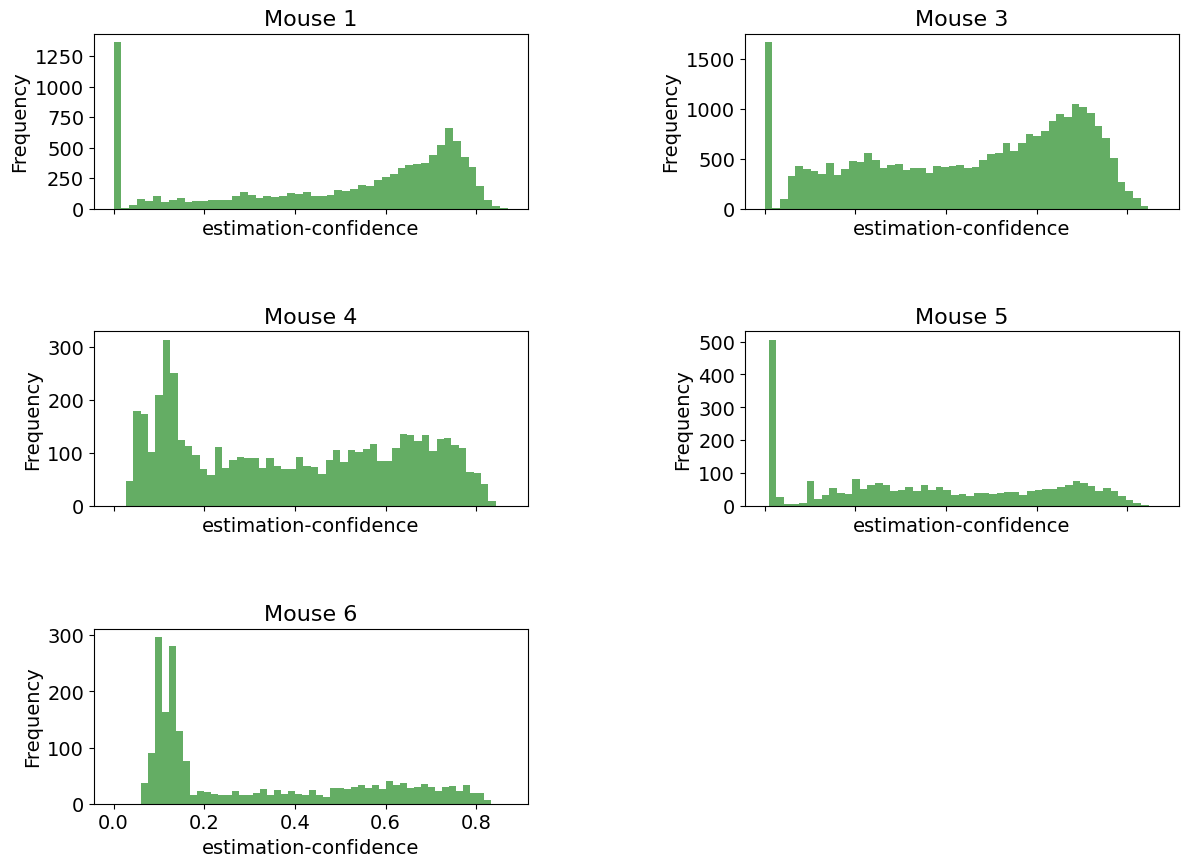

In [6]:
# plot histogramm for each mouse

axislabel_fontsize = 14
title_fontsize = 16

plt.subplots(3, 2, figsize=(14, 10), sharex=True)
for i, mouse_id in enumerate([1, 3, 4, 5, 6]):
    plt.subplot(3, 2, i+1)
    df = pd.read_csv(f'../data/A{mouse_id}/trials.csv', header=[0, 1], index_col=[0, 1]) 
    min_likelihood = df.xs('likelihood', level=1, axis=1).min(axis=1)

    # set values below 0 to 0 for better visualization
    min_likelihood[min_likelihood < 0] = 0
    
    plt.hist(min_likelihood, bins=50, color='forestgreen', alpha=0.7)
    plt.xlabel('estimation-confidence', fontsize=axislabel_fontsize)
    plt.ylabel('Frequency', fontsize=axislabel_fontsize)
    plt.title(f'Mouse {mouse_id}', fontsize=title_fontsize)
    plt.subplots_adjust(hspace=0.7, wspace=.5)
    # adjust size of tick labels
    plt.xticks(fontsize=axislabel_fontsize)
    plt.yticks(fontsize=axislabel_fontsize)


# turn off empty subplot
plt.subplot(3, 2, 6).axis('off')
#plt.tight_layout()

###

##  trialbased likelihood evaluation

In [7]:
threshold = 0.33

#### (plotting functions)

In [100]:
axislabel_fontsize = 14
title_fontsize = 16

FIGSIZE = (10, 20)

##### plot top10 and bottom10 average likelihood trials (>20 trials total)

In [108]:
def plot_top10bottom10_min_likelihood(df, threshold, stimulus_frame=50):

    # calculate min likelihood for each frame across all body parts
    min_likelihood = df.xs('likelihood', level=1, axis=1).min(axis=1)

    # sample 10 trials with highest average min likelihood
    avg_min_likelihood = min_likelihood.groupby(level=0).mean()
    top_trial_ids = avg_min_likelihood.nlargest(10).index
    top10_min_likelihood = min_likelihood.loc[top_trial_ids]

    # sample 10 trials with highest average min likelihood
    top_trial_ids = avg_min_likelihood.nsmallest(10).index
    bottom10_min_likelihood = min_likelihood.loc[top_trial_ids]

    # combine both samples
    min_likelihood = pd.concat([top10_min_likelihood, bottom10_min_likelihood])
    sampled_trial_ids = min_likelihood.index.get_level_values(0).unique()

    # set every value smaller than zero to zero
    min_likelihood[min_likelihood < 0] = 0

    # plot in two columns, top10 left, bottom10 right
    plt.subplots(10, 2, figsize=FIGSIZE, sharex=True, sharey=True)
    for i, trial_id in enumerate(sampled_trial_ids):
        plt.subplot(10, 2, i+1)
        trial_min_likelihood = min_likelihood.loc[trial_id].reset_index(drop=True)
        plt.plot(trial_min_likelihood, color='blue')
        plt.axhline(y=threshold, color='red', linestyle='--', label=f'Threshold {threshold}')
        plt.axvline(x=stimulus_frame, color='green', linestyle='--', label='Stimulus Onset')
        plt.ylim([-0.05, 1.05])
        if i == 18 or i == 19:
            plt.xlabel('Frame', fontsize=axislabel_fontsize)
        if i % 2 == 0:
            plt.ylabel('estimation-\nconfidence', fontsize=axislabel_fontsize)
        plt.xticks(fontsize=axislabel_fontsize)
        plt.yticks(fontsize=axislabel_fontsize)

    plt.tight_layout()

##### plot all trials (< trials total)

In [105]:
def plot_all_trials(df, threshold, stimulus_frame=50):
    # calculate min likelihood for each frame across all body parts
    min_likelihood = df.xs('likelihood', level=1, axis=1).min(axis=1)

    trial_ids = df.index.get_level_values(0).unique()
    n_trials = len(trial_ids)
    # plot in two columns
    plt.subplots(n_trials//2, 2, figsize=(FIGSIZE[0], FIGSIZE[1] * n_trials/20), sharex=True, sharey=True)
    for i, trial_id in enumerate(trial_ids):
        plt.subplot(n_trials//2, 2, i+1)
        trial_min_likelihood = min_likelihood.loc[trial_id].reset_index(drop=True)
        plt.plot(trial_min_likelihood, color='blue')
        plt.axhline(y=threshold, color='red', linestyle='--', label=f'Threshold {threshold}')
        plt.axvline(x=stimulus_frame, color='green', linestyle='--', label='Stimulus Onset')
        plt.ylim([-0.05, 1.05])
        if i == n_trials-2 or i == n_trials-1:
            plt.xlabel('Frame', fontsize=axislabel_fontsize)
        if i % 2 == 0:
            plt.ylabel('estimation-\n confidence', fontsize=axislabel_fontsize)
        plt.xticks(fontsize=axislabel_fontsize)
        plt.yticks(fontsize=axislabel_fontsize)
    plt.tight_layout()

### plots

mouse 1

In [106]:
mouse_id = 1
df = pd.read_csv(f'../data/A{mouse_id}/trials.csv', header=[0, 1], index_col=[0, 1])
# get no of trials
df.index.get_level_values(0).nunique()

67

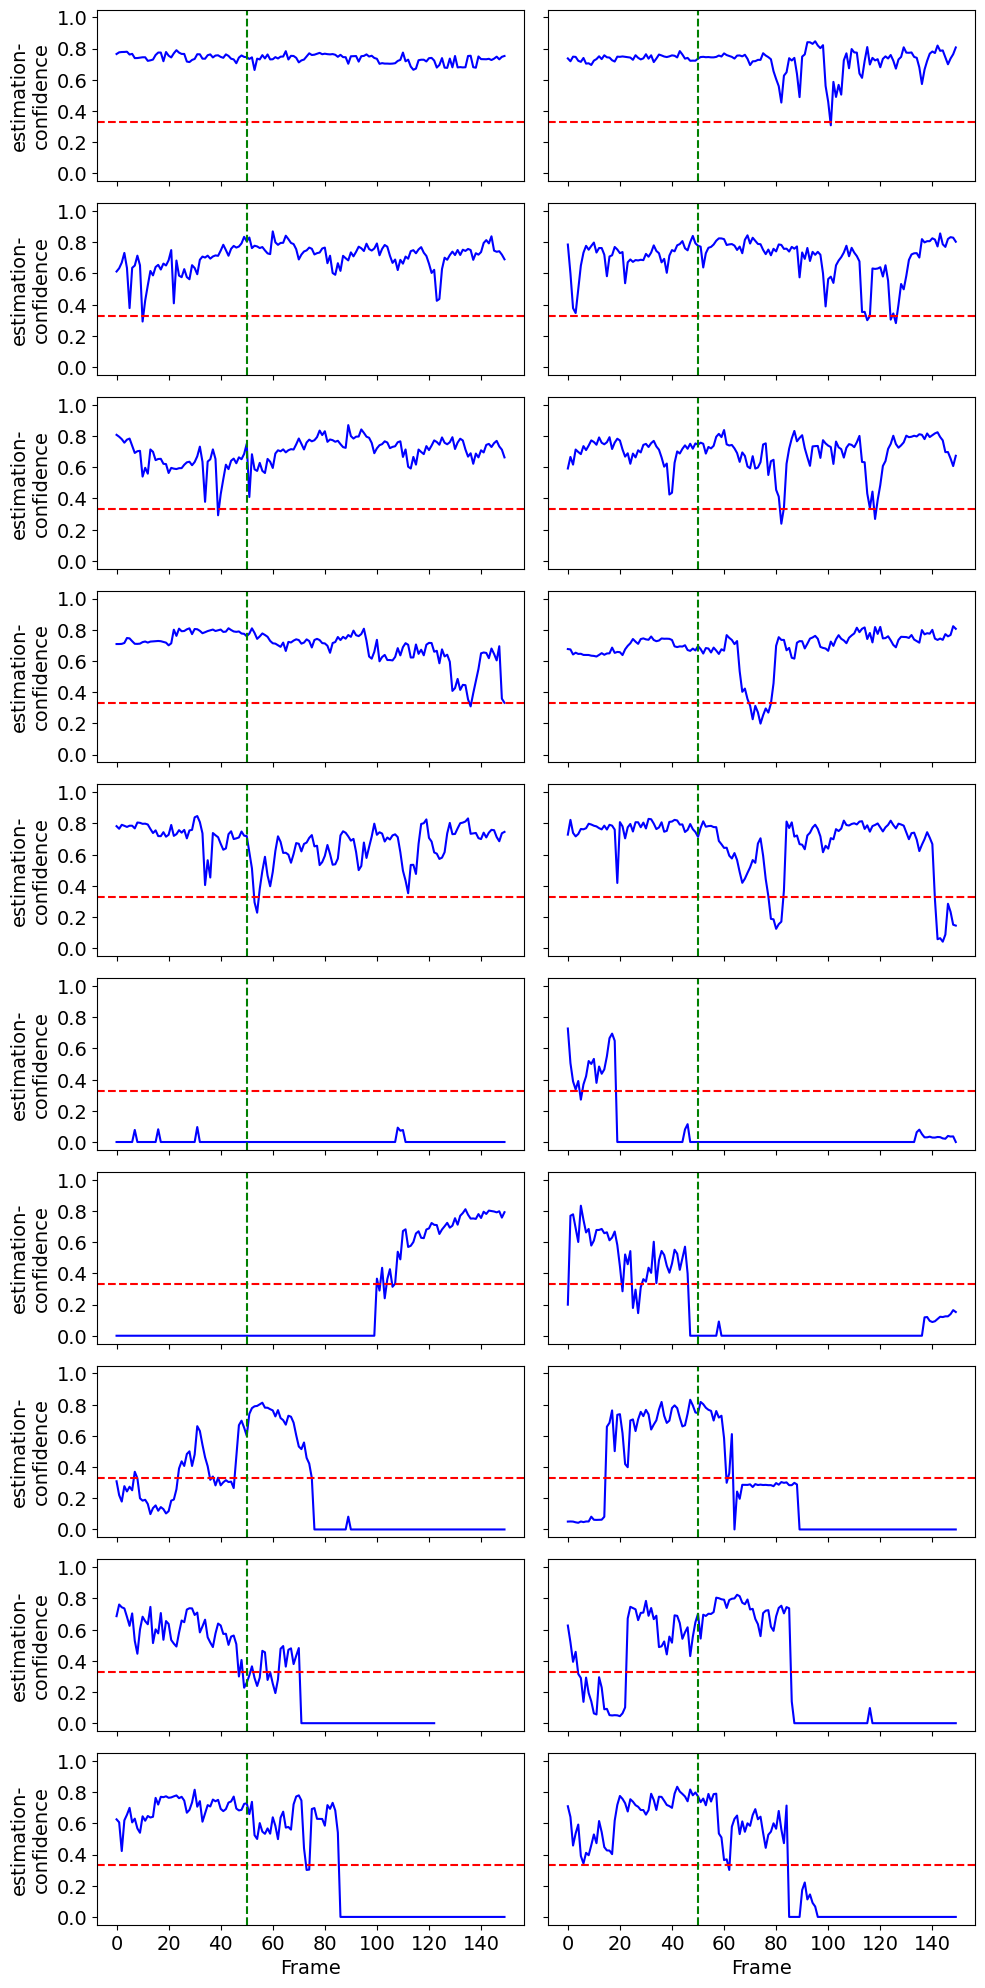

In [109]:
plot_top10bottom10_min_likelihood(df, threshold)

mouse 3

In [85]:
mouse_id = 3
df = pd.read_csv(f'../data/A{mouse_id}/trials.csv', header=[0, 1], index_col=[0, 1])
# get no of trials
df.index.get_level_values(0).nunique()

178

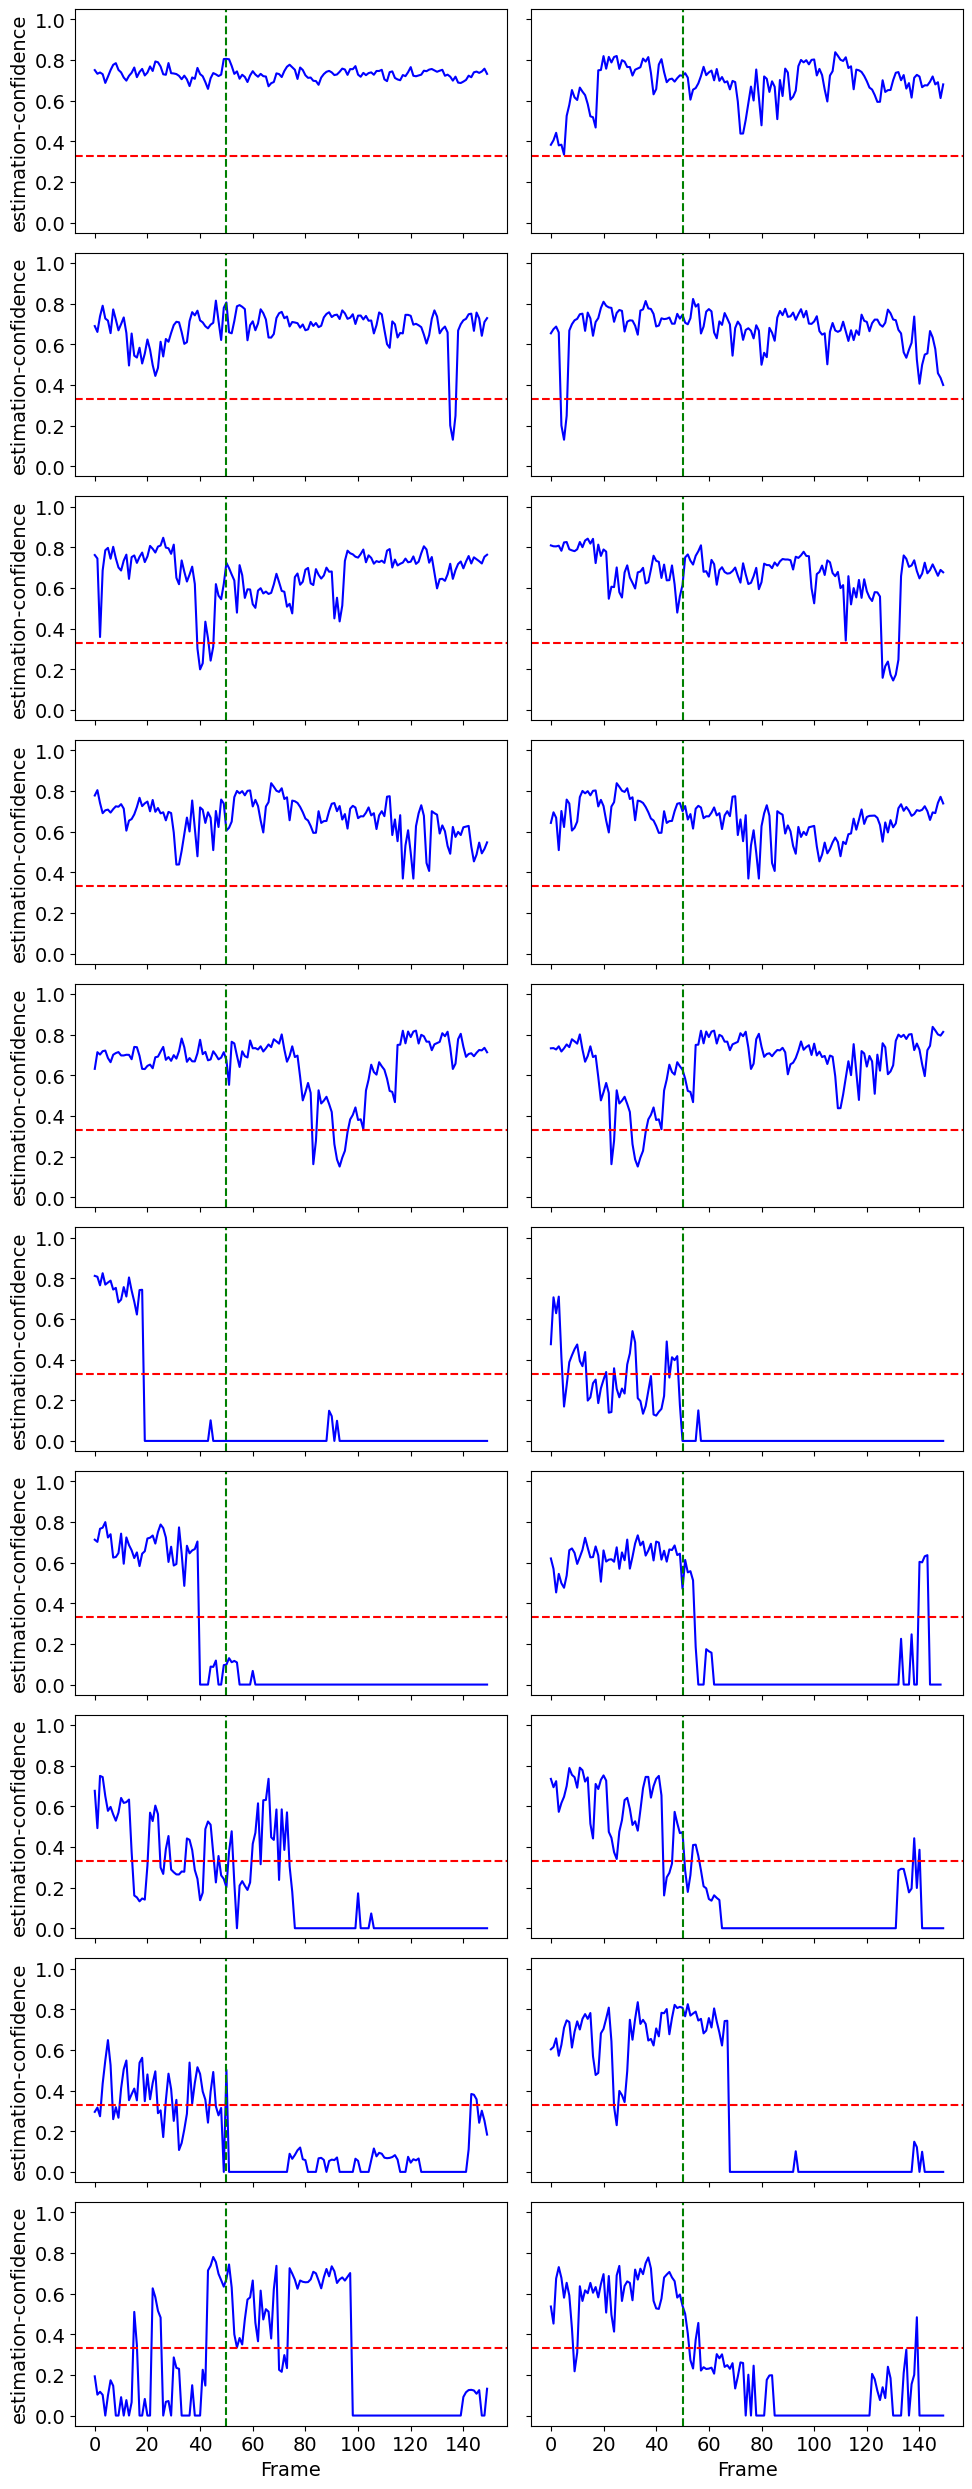

In [86]:
plot_top10bottom10_min_likelihood(df, threshold)

mouse 4

In [87]:
mouse_id = 4
df = pd.read_csv(f'../data/A{mouse_id}/trials.csv', header=[0, 1], index_col=[0, 1])
# get no of trials
df.index.get_level_values(0).nunique()

35

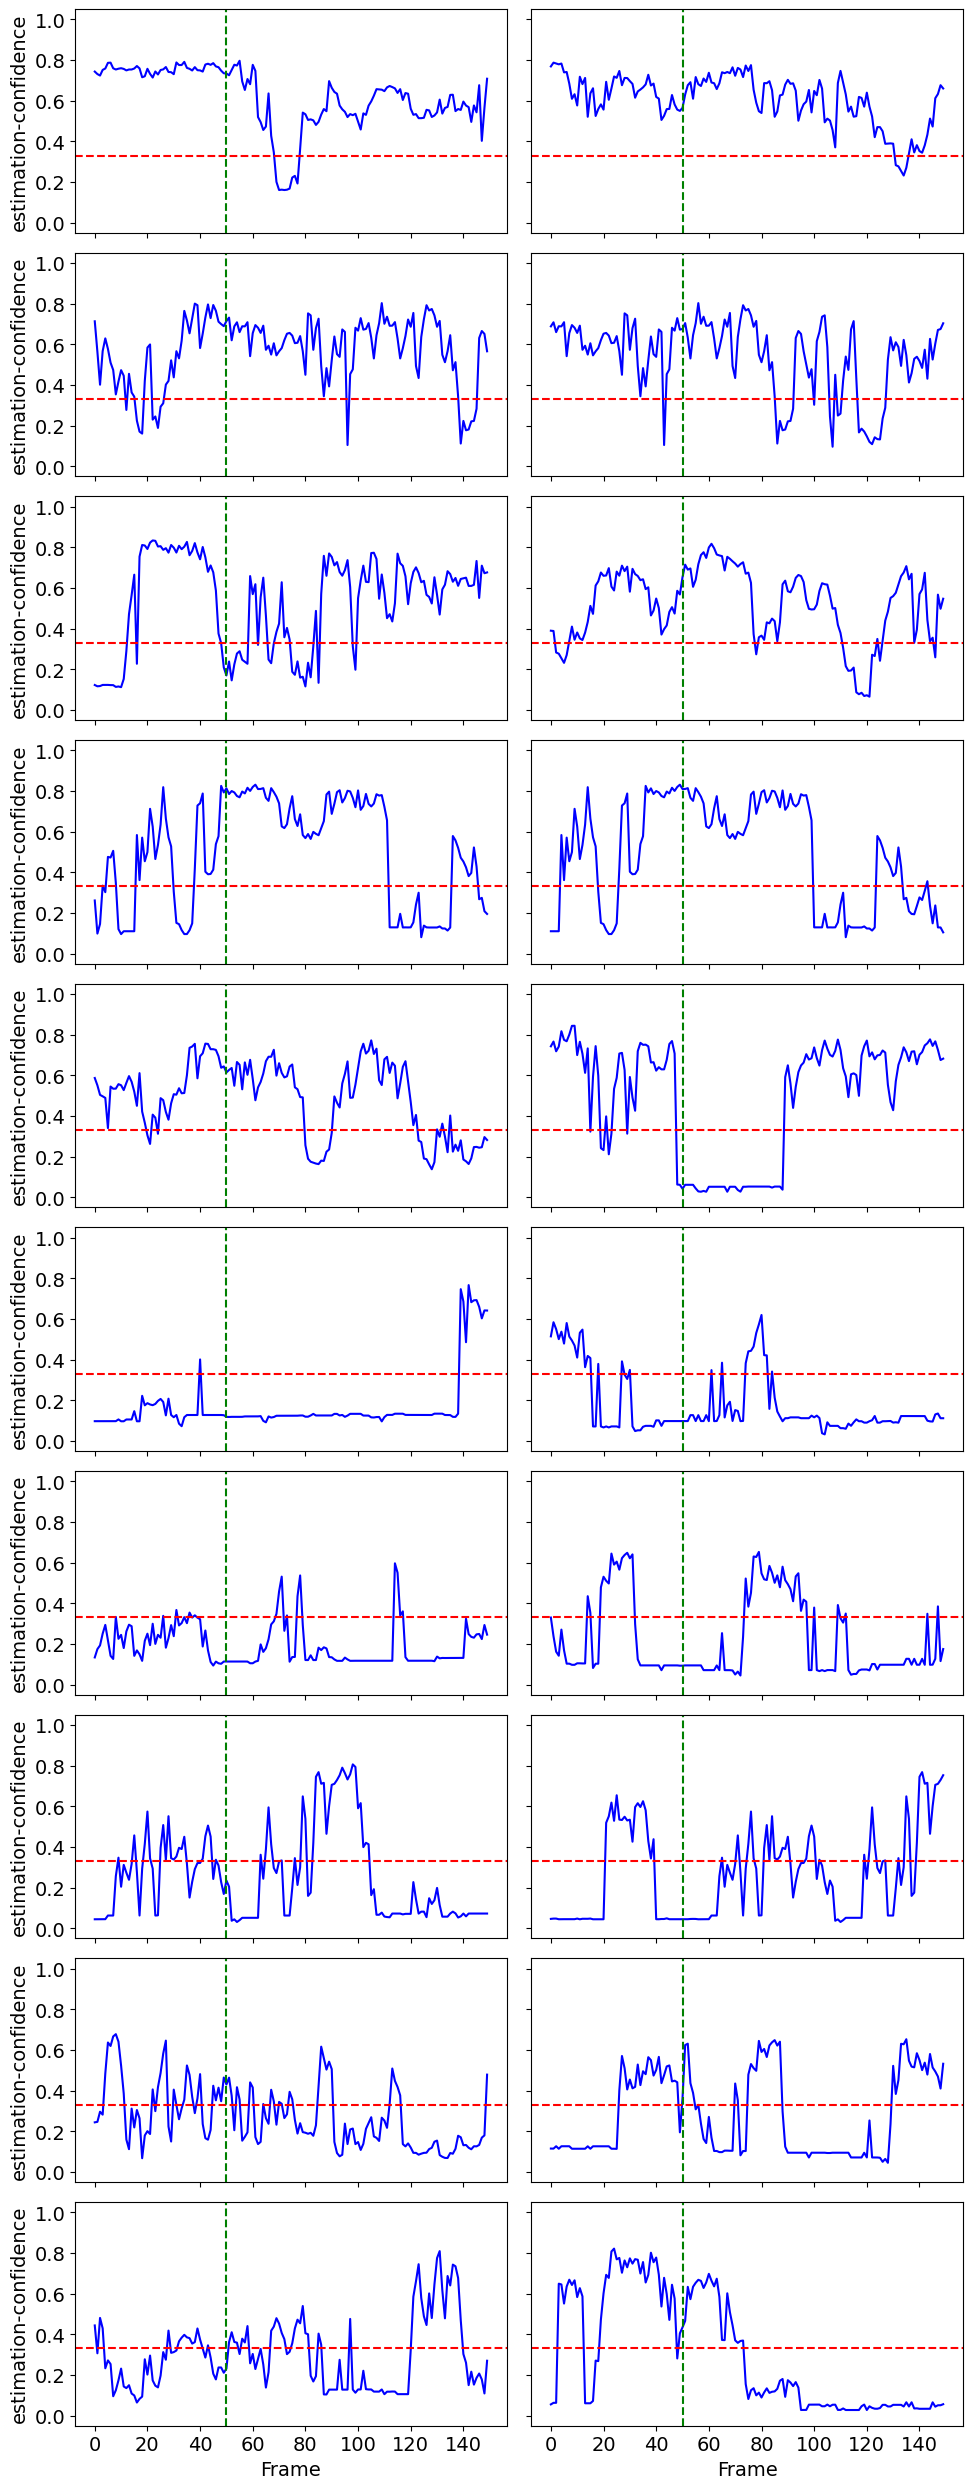

In [88]:
plot_top10bottom10_min_likelihood(df, threshold)

mouse 5

In [96]:
mouse_id = 5
df = pd.read_csv(f'../data/A{mouse_id}/trials.csv', header=[0, 1], index_col=[0, 1])
# get no of trials
df.index.get_level_values(0).nunique()

18

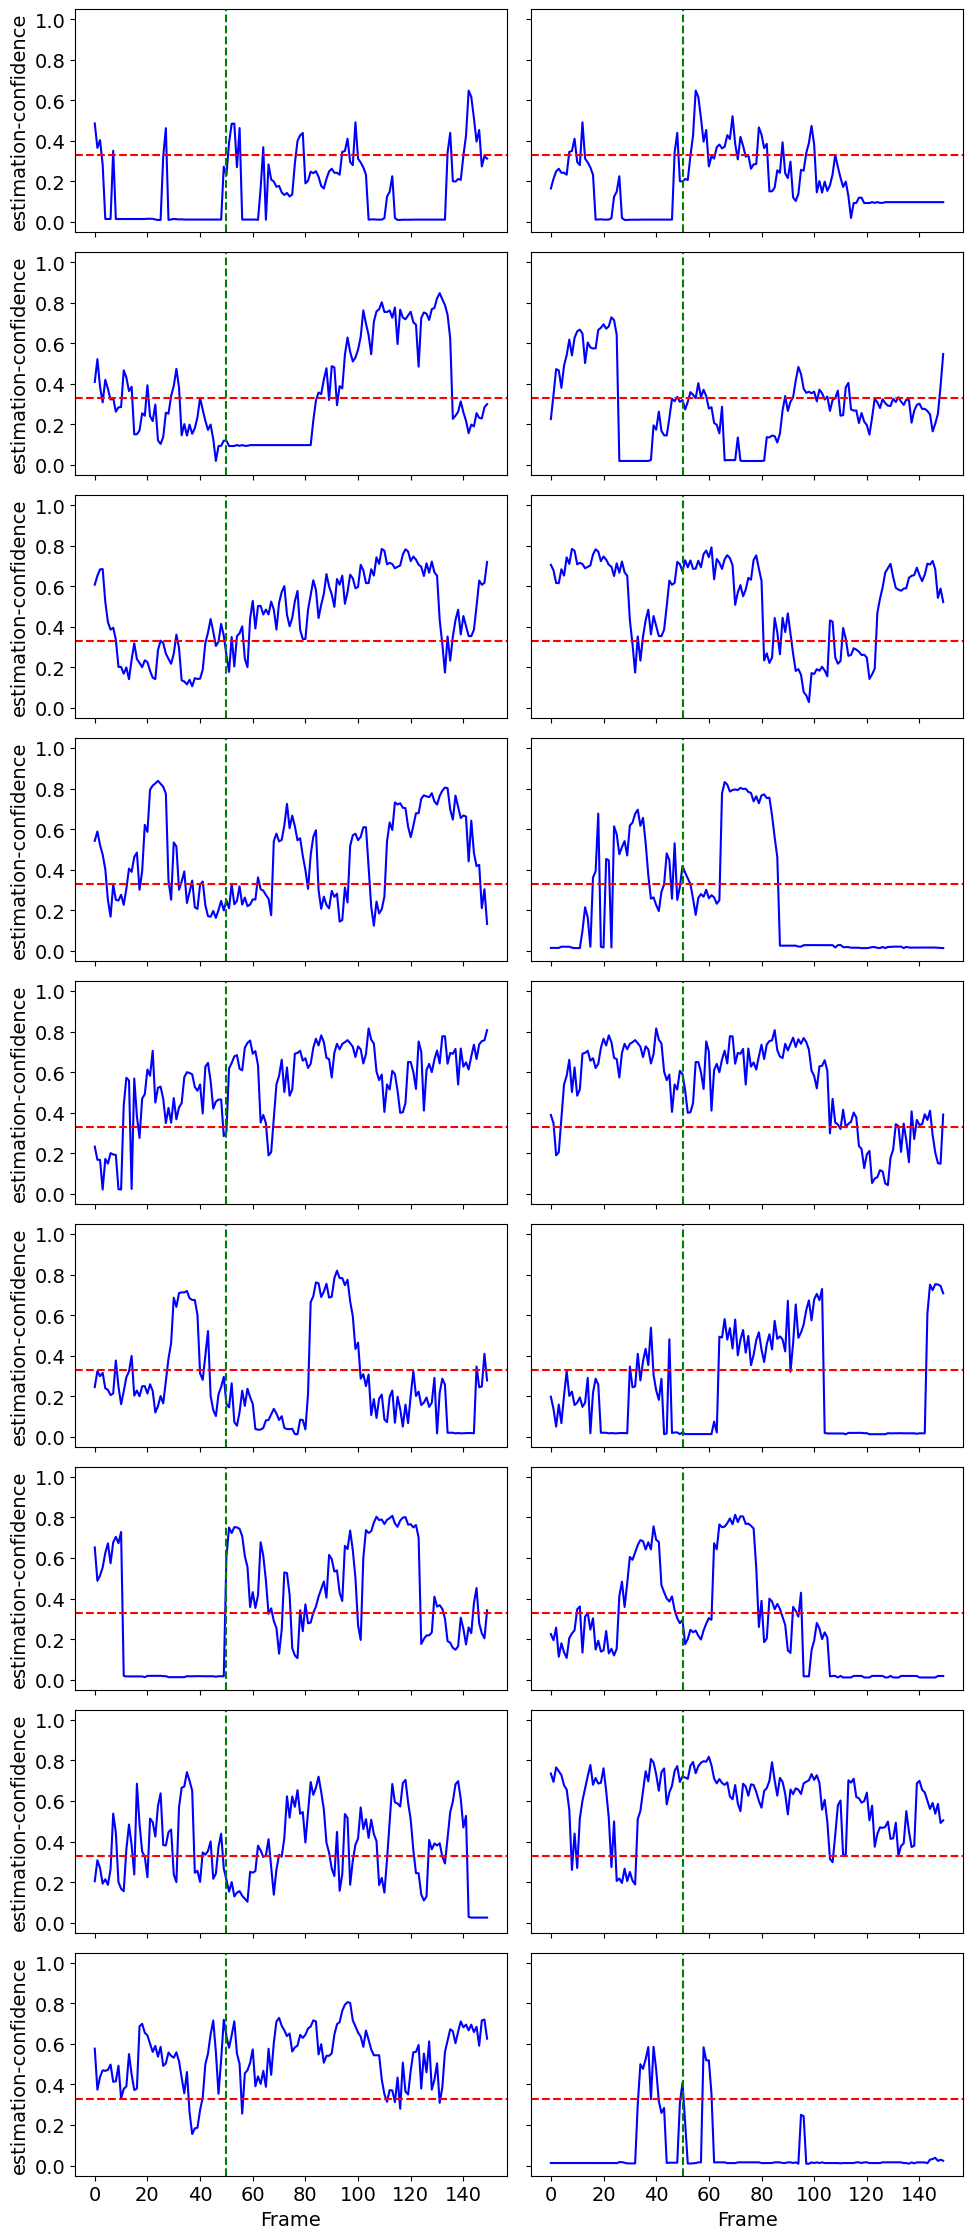

In [97]:
plot_all_trials(df, threshold)

mouse 6

In [98]:

mouse_id = 6
df = pd.read_csv(f'../data/A{mouse_id}/trials.csv', header=[0, 1], index_col=[0, 1])
# get no of trials
df.index.get_level_values(0).nunique()

14

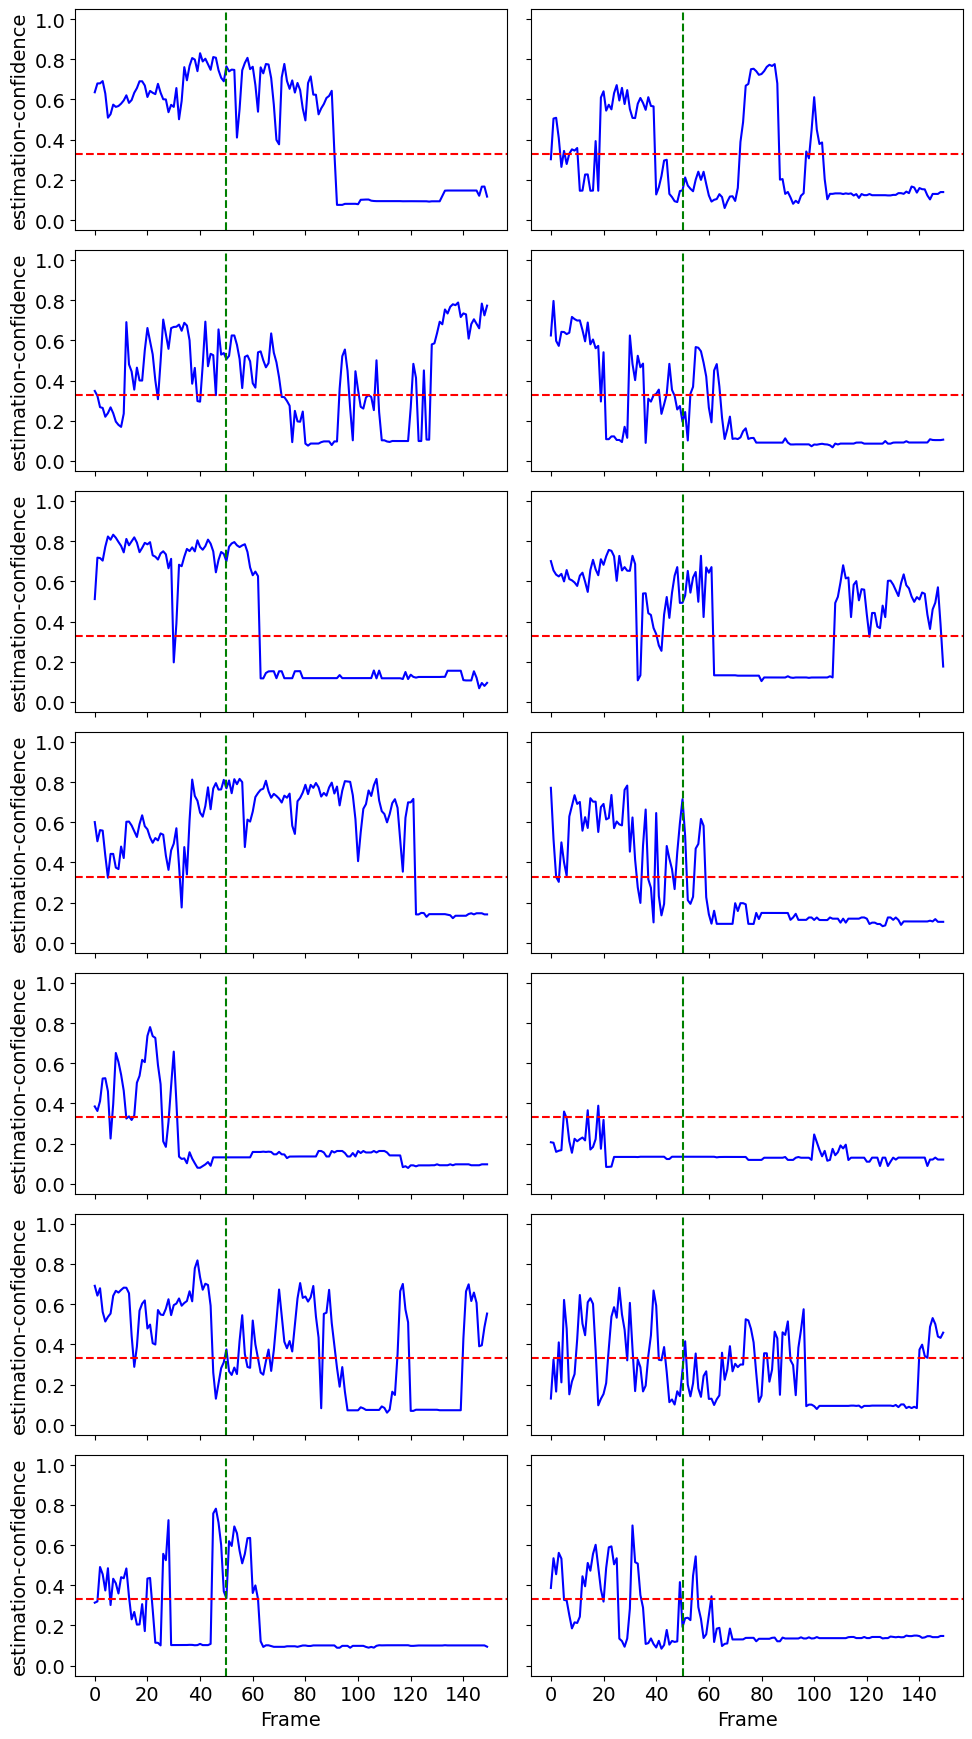

In [99]:
plot_all_trials(df, threshold)

## 

# (old) table position

analyses relating to table position such upper lower table (i.e. place avoidance) and inner outer table.

fot this analysis, the center position of the table for each animal has to be set manually.

(this may be the least reward to effort ratio, so do this last)

In [21]:
mouse_id = 1

folder = f'../data/A{mouse_id}/'

# list all .csv files in the folder

glob.glob(os.path.join(folder, '*.csv'))
# take only files with FH00XX in the name
file_list = [f for f in glob.glob(os.path.join(folder, '*.csv')) if 'FH00' in f]
file_list.sort()
file_list

['../data/A1/FH0002 25-11-14 14-37-02DLC_HrnetW32_HD3Nov5shuffle1_detector_200_snapshot_010.csv',
 '../data/A1/FH0003 25-11-14 14-38-06DLC_HrnetW32_HD3Nov5shuffle1_detector_200_snapshot_010.csv',
 '../data/A1/FH0004 25-11-14 14-41-12DLC_HrnetW32_HD3Nov5shuffle1_detector_200_snapshot_010.csv',
 '../data/A1/FH0005 25-11-14 14-41-27DLC_HrnetW32_HD3Nov5shuffle1_detector_200_snapshot_010.csv',
 '../data/A1/FH0006 25-11-14 14-44-39DLC_HrnetW32_HD3Nov5shuffle1_detector_200_snapshot_010.csv',
 '../data/A1/FH0007 25-11-14 14-45-55DLC_HrnetW32_HD3Nov5shuffle1_detector_200_snapshot_010.csv',
 '../data/A1/FH0008 25-11-14 14-47-01DLC_HrnetW32_HD3Nov5shuffle1_detector_200_snapshot_010.csv',
 '../data/A1/FH0009 25-11-14 14-49-15DLC_HrnetW32_HD3Nov5shuffle1_detector_200_snapshot_010.csv',
 '../data/A1/FH0010 25-11-14 14-51-06DLC_HrnetW32_HD3Nov5shuffle1_detector_200_snapshot_010.csv',
 '../data/A1/FH0011 25-11-14 14-51-54DLC_HrnetW32_HD3Nov5shuffle1_detector_200_snapshot_010.csv',
 '../data/A1/FH0012 

In [22]:
# concat all pose data into a single dataframe
df_list = []
for file in file_list:
    df = pd.read_csv(file, skiprows=1)
    df = df.T.reset_index()
    df["index"] = [
        "bodyparts",
        "nose",
        "nose",
        "nose",
        "left_ear",
        "left_ear",
        "left_ear",
        "right_ear",
        "right_ear",
        "right_ear",
    ]
    df = df.set_index(["index", 0])

    df.index.names = ["bodyparts", "coords"]
    df = df.drop("bodyparts", level=0)
    df = df.T
    df.index.names = ["frame"]
    df_list.append(df)

full_df = pd.concat(df_list, ignore_index=True)
full_df

bodyparts                nose                                    \
coords                      x                  y     likelihood   
0                        -1.0               -1.0           -1.0   
1                        -1.0               -1.0           -1.0   
2                        -1.0               -1.0           -1.0   
3                        -1.0               -1.0           -1.0   
4                        -1.0               -1.0           -1.0   
...                       ...                ...            ...   
77199                    -1.0               -1.0           -1.0   
77200                    -1.0               -1.0           -1.0   
77201                    -1.0               -1.0           -1.0   
77202         407.78759765625  722.8573608398438    0.865234375   
77203      407.30206298828125  715.9445190429688  0.84130859375   

bodyparts            left_ear                                  \
coords                      x                  y   likelihood   
0                        -1.0               -1.0         -1.0   
1                        -1.0               -1.0         -1.0   
2                        -1.0               -1.0         -1.0   
3                        -1.0               -1.0         -1.0   
4                        -1.0               -1.0         -1.0   
...                       ...                ...          ...   
77199                    -1.0               -1.0         -1.0   
77200                    -1.0               -1.0         -1.0   
77201                    -1.0               -1.0         -1.0   
77202       394.9671630859375  721.7662353515625  0.654296875   
77203      393.85662841796875  714.6990966796875    0.6640625   

bodyparts           right_ear                                    
coords                      x                  y     likelihood  
0                        -1.0               -1.0           -1.0  
1                        -1.0               -1.0           -1.0  
2                        -1.0               -1.0           -1.0  
3                        -1.0               -1.0           -1.0  
4                        -1.0               -1.0           -1.0  
...                       ...                ...            ...  
77199                    -1.0               -1.0           -1.0  
77200                    -1.0               -1.0           -1.0  
77201                    -1.0               -1.0           -1.0  
77202      390.49395751953125  737.0659790039062  0.44677734375  
77203      392.41607666015625    728.16650390625  0.53369140625  

[77204 rows x 9 columns]

In [23]:
# remove rows with low likelihood
likelihood_threshold = 0.3

# set x and y to NaN if likelihood is below threshold
full_df.loc[full_df[("nose", "likelihood")].astype(float) < likelihood_threshold, ("nose", "x")] = float('nan')
full_df.loc[full_df[("nose", "likelihood")].astype(float) < likelihood_threshold, ("nose", "y")] = float('nan')
full_df.loc[full_df[("left_ear", "likelihood")].astype(float) < likelihood_threshold, ("left_ear", "x")] = float('nan')
full_df.loc[full_df[("left_ear", "likelihood")].astype(float) < likelihood_threshold, ("left_ear", "y")] = float('nan')
full_df.loc[full_df[("right_ear", "likelihood")].astype(float) < likelihood_threshold, ("right_ear", "x")] = float('nan')
full_df.loc[full_df[("right_ear", "likelihood")].astype(float) < likelihood_threshold, ("right_ear", "y")] = float('nan')

# if there is any NaN in a row, set the whole row to NaN
full_df = full_df.dropna().reset_index(drop=True)
full_df

bodyparts                nose                                     \
coords                      x                   y     likelihood   
0           383.7420654296875  51.106231689453125  0.69482421875   
1          391.64874267578125   60.53385925292969  0.76220703125   
2          395.82354736328125   65.78987121582031  0.74072265625   
3          402.25994873046875   73.35723876953125       0.703125   
4          409.34454345703125    82.7254409790039  0.73095703125   
...                       ...                 ...            ...   
26545      385.81048583984375   713.4788818359375    0.845703125   
26546       386.5179443359375   719.2667236328125     0.87890625   
26547      389.47076416015625   731.6304931640625   0.8662109375   
26548         407.78759765625   722.8573608398438    0.865234375   
26549      407.30206298828125   715.9445190429688  0.84130859375   

bodyparts            left_ear                                    \
coords                      x                  y     likelihood   
0          394.00421142578125  47.12130355834961  0.57861328125   
1          401.22186279296875  54.27874755859375  0.63037109375   
2          406.66595458984375  57.33319854736328  0.58837890625   
3           414.2560119628906  62.26863098144531  0.58544921875   
4          421.01226806640625  67.72093200683594  0.56494140625   
...                       ...                ...            ...   
26545       383.6546630859375       701.87890625   0.6884765625   
26546       385.9242858886719  706.8038940429688    0.767578125   
26547       389.9980163574219  718.8811645507812   0.7333984375   
26548       394.9671630859375  721.7662353515625    0.654296875   
26549      393.85662841796875  714.6990966796875      0.6640625   

bodyparts           right_ear                                      
coords                      x                   y      likelihood  
0           384.7325744628906  32.826202392578125   0.52294921875  
1          389.38226318359375      45.56201171875  0.330322265625  
2           394.4260559082031   49.83441162109375  0.437255859375  
3           400.2064208984375  56.687416076660156     0.587890625  
4            406.510009765625   64.35086059570312   0.66552734375  
...                       ...                 ...             ...  
26545          374.7197265625      709.2548828125   0.63916015625  
26546         376.54248046875   713.8862915039062     0.716796875  
26547        379.927001953125   725.5743408203125   0.65771484375  
26548      390.49395751953125   737.0659790039062   0.44677734375  
26549      392.41607666015625     728.16650390625   0.53369140625  

[26550 rows x 9 columns]

In [24]:
# write table center and radius for each mouseinto dataframe
table_centers = {
    1: (537, 385),
    2: (999, 999),
    3: (516, 383),
    4: (330, 241),
    5: (345, 242),
}

table_radii = {
    1: 378,
    2: 999,
    3: 378,
    4: 237,
    5: 238,
}
table_df = pd.DataFrame.from_dict(table_centers, orient='index', columns=['table_center_x', 'table_center_y'])
table_df.index.name = 'mouse_id'
table_df['table_radius'] = pd.Series(table_radii)
table_df


,table_center_x,table_center_y,table_radius
mouse_id,,,
1,537,385,378
2,999,999,999
3,516,383,378
4,330,241,237
5,345,242,238


### load pose data

In [25]:
def load_pose_data(mouse_id):

    folder = f'../data/A{mouse_id}/'

    # take only files with FH00XX in the name
    file_list = [f for f in glob.glob(os.path.join(folder, '*.csv')) if 'FH00' in f]

    df_list = []
    for file in file_list:
        df = pd.read_csv(file, skiprows=1)
        df = df.T.reset_index()
        df["index"] = [
            "bodyparts",
            "nose",
            "nose",
            "nose",
            "left_ear",
            "left_ear",
            "left_ear",
            "right_ear",
            "right_ear",
            "right_ear",
        ]
        df = df.set_index(["index", 0])

        df.index.names = ["bodyparts", "coords"]
        df = df.drop("bodyparts", level=0)
        df = df.T
        df.index.names = ["frame"]
        df_list.append(df)

    full_df = pd.concat(df_list, ignore_index=True)

    likelihood_threshold = 0.3

    # convert all columns to float
    full_df = full_df.astype(float)

    full_df.loc[full_df[("nose", "likelihood")] < likelihood_threshold, ("nose", "x")] = float('nan')
    full_df.loc[full_df[("nose", "likelihood")] < likelihood_threshold, ("nose", "y")] = float('nan')
    full_df.loc[full_df[("left_ear", "likelihood")] < likelihood_threshold, ("left_ear", "x")] = float('nan')
    full_df.loc[full_df[("left_ear", "likelihood")] < likelihood_threshold, ("left_ear", "y")] = float('nan')
    full_df.loc[full_df[("right_ear", "likelihood")] < likelihood_threshold, ("right_ear", "x")] = float('nan')
    full_df.loc[full_df[("right_ear", "likelihood")] < likelihood_threshold, ("right_ear", "y")] = float('nan')

    full_df = full_df.dropna().reset_index(drop=True)

    return full_df

In [26]:
# in what percentage of frames mouse is in outer 30% of table
def percentage_in_outer_ring(mouse_id, df_, outer_ratio=1.0, inner_ratio=0.75):
    center_x = table_df.loc[mouse_id, 'table_center_x']
    center_y = table_df.loc[mouse_id, 'table_center_y']
    radius = table_df.loc[mouse_id, 'table_radius']
    outer_radius = radius * outer_ratio
    inner_radius = radius * inner_ratio

    dx = df_[('nose', 'x')] - center_x
    dy = df_[('nose', 'y')] - center_y
    distances = (dx**2 + dy**2)**0.5

    in_outer_ring = (distances >= inner_radius) & (distances <= outer_radius)
    percentage = in_outer_ring.sum() / len(df_) * 100
    return percentage

In [27]:
mouse_ids = [1, 3, 4, 5]
results = {}
for mouse_id in mouse_ids:
    df_ = load_pose_data(mouse_id)
    percentage = percentage_in_outer_ring(mouse_id, df_)
    results[mouse_id] = round(percentage, 2)

print("Percentace of time spent in outer 25% of table:")

import math
outer_radius_ratio = 1.0
inner_radius_ratio = 0.75
outer_area = math.pi * (outer_radius_ratio ** 2)
inner_area = math.pi * (inner_radius_ratio ** 2)
outer_ring_area_percentage = (outer_area - inner_area) / outer_area * 100


Percentace of time spent in outer 25% of table:


In [28]:
# upper lower half of table
def percentage_in_upper_lower_half(mouse_id, df_, upper=True):
    center_x = table_df.loc[mouse_id, 'table_center_x']
    center_y = table_df.loc[mouse_id, 'table_center_y']

    dy = df_[('nose', 'y')] - center_y

    if upper:
        in_half = dy < 0
    else:
        in_half = dy >= 0

    percentage = in_half.sum() / len(df_) * 100
    return percentage

In [29]:
print(f"Outer 25% of radius corresponds to {outer_ring_area_percentage:.2f}% of the area.")

for mouse_id in mouse_ids:
    # print how much time spent in outer 25% of table for each mouse (stored in results)
    print(f"Mouse {mouse_id}: {results[mouse_id]:.2f}%")

Outer 25% of radius corresponds to 43.75% of the area.
Mouse 1: 26.82%
Mouse 3: 33.32%
Mouse 4: 38.76%
Mouse 5: 33.16%


In [30]:
for mouse_id in mouse_ids:
    df_ = load_pose_data(mouse_id)
    upper_percentage = percentage_in_upper_lower_half(mouse_id, df_, upper=True)
    lower_percentage = percentage_in_upper_lower_half(mouse_id, df_, upper=False)
    print(f"Mouse {mouse_id}: Upper half: {upper_percentage:.2f}%, Lower half: {lower_percentage:.2f}%")

Mouse 1: Upper half: 73.23%, Lower half: 26.77%
Mouse 3: Upper half: 62.01%, Lower half: 37.99%
Mouse 4: Upper half: 59.98%, Lower half: 40.02%
Mouse 5: Upper half: 44.84%, Lower half: 55.16%
